<div style="border: 1px solid #C1E1FF; padding: 20px; background-color: #F3F6FF; border-radius:5px;">
<center>
<h1>Detección de cáncer de mama utilizando `sklearn`</h1><br/><br/>

<span style="color:#222"><b>Diego García Morate<b></span><br/>
<span style="color:#222">diegogm at unlimiteck.com</span><br/>

<br/>
<span style="color:#666">Meetup Data Science with Python</span><br/>
<span style="color:#888">Miércoles, 7 de Marzo de 2018 @ TheCubeMadrid</span><br/>

</center>
</div>

<div style="background-color:#009fdf; color:white; padding:30px; border-radius:5px; font-size:28px; font-weight:500;">
<span>Los problemas de clasificación</span>
</div>

Imaginate que tenemos un dataset con datos de distintos sensores de un coche (temperatura del motor, nivel de aceite...), y queremos saber a partir de esos sensores si el coche está funcionando bien o mal. ¿Cómo podríamos hacerlo?.

La manera tradicional consiste en crear una serie de reglas que relacionen los distintos sensores y que definan que rangos de funcionamiento son buenos o malos. De esta manera podríamos definir si el funcionamiento es `bueno` o `malo`.

Cada una de las reglas podría ser de este estilo:

<pre style="background-color:#efefef; padding: 20px;">
si (temp_motor > 100ºC) y (nivel_aceite < 30) entonces estado malo
si (temp_motor >  30ºC) y (nivel_aceite > 30) entonces estado bueno
</pre>

El problema de este enfoque es que nos obliga a conocer las relaciones que existen entre cada una de las variables y esto puede ser muy complicado.

La premisa de la que parte el aprendizaje automático es la siguiente: **¿Podríamos a partir de un conjunto de datos ya etiquetados generar automáticamente esas `reglas`?**

<img src="ml_vs_programming.png" width="40%" />

La respuesta es sí, y eso es una de los principales problemas a resolver en Machine Learning.

Antes de empezar:

* Llamaremos a esas `reglas` que queremos generar: **`modelo`**.
* Llamaremos al conjunto de datos previamente etiquetados: `conjunto de entrenamiento` o `dataset`.
* A cada uno de los casos individuales a evaluar lo llamaremos `instancia`.

<div style="background-color:#009fdf; color:white; padding:30px; border-radius:5px; font-size:28px; font-weight:500;">
<span>Objetivo de este challenge</span>
</div>

El objetivo de este challenge es entrenar un **modelo** capaz de determinar de forma automática si un tumor es `benigno` o `maligno`.

De paso, aprenderemos algunas técnicas de evaluación algoritmos de clasificación.

### Configuración del entorno

Antes de empezar vamos a cargar unos cuantos paquetes de python. Entre ellos usaremos `sklearn` como biblioteca de ML sobre la cual entrenar nuestro modelo.

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

<div style="background-color:#009fdf; color:white; padding:30px; border-radius:5px; font-size:28px; font-weight:500;">
<span>Dataset</span>
</div>

En este caso vamos a utilizar un dataset real de análisis de cáncer de mama del Breast Cancer Center de Wisconsin. Este dataset está disponible en `sklearn` así que cargarlo es tan fácil como:

In [2]:
from sklearn import datasets
dataset = sklearn.datasets.load_breast_cancer()

Como siempre, una vez cargado debemos inspeccionar y comprender el dataset:

In [3]:
print(dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print(dataset.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

Como se indica en la descripción del dataset, éste consta de 569 instancias con 30 atributos numéricos cada uno.

In [5]:
dataset_X = dataset.data

In [6]:
dataset_X.shape

(569, 30)

In [7]:
dataset_X[0]

array([  1.79900000e+01,   1.03800000e+01,   1.22800000e+02,
         1.00100000e+03,   1.18400000e-01,   2.77600000e-01,
         3.00100000e-01,   1.47100000e-01,   2.41900000e-01,
         7.87100000e-02,   1.09500000e+00,   9.05300000e-01,
         8.58900000e+00,   1.53400000e+02,   6.39900000e-03,
         4.90400000e-02,   5.37300000e-02,   1.58700000e-02,
         3.00300000e-02,   6.19300000e-03,   2.53800000e+01,
         1.73300000e+01,   1.84600000e+02,   2.01900000e+03,
         1.62200000e-01,   6.65600000e-01,   7.11900000e-01,
         2.65400000e-01,   4.60100000e-01,   1.18900000e-01])

Este dataset clasifica los casos en cáncer maligno ($0$) o benigno ($1$).

In [8]:
print(dataset.target_names)

['malignant' 'benign']


In [9]:
dataset_y = dataset.target

In [10]:
dataset_y.shape

(569,)

In [11]:
print(dataset_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

### Preguntas sobre el dataset
#### ¿Está balanceado o desbalanceado?

Un dataset se denomina balanceado cuando el número de instancias de cada clase es similar.

In [12]:
np.bincount(dataset.target)

array([212, 357])

Como podemos ver hay 212 casos malignos y 357 benignos.

In [13]:
np.bincount(dataset.target)[0] / dataset.target.shape[0]

0.37258347978910367

El 37% de los casos son malignos y el 63% son benignos, el dataset está desbalanceado pero no mucho.

#### ¿Es suficientemente extenso para entrenar un modelo?

Tiene 569 instancias, con 30 atributos cada una.

* Si cada atributo fuera una variable binaria totalmente independiente necesitaríamos $2^{30}$ = 1.000 millones de instancias para recubrir todas las posibles combinaciones

No existe una respuesta fácil a esta pregunta, dependerá de la redundancia interna entre variables, la relación entre las mismas y la aportación de cada variable a la variable objetivo.

<div style="background-color:#009fdf; color:white; padding:30px; border-radius:5px; font-size:28px; font-weight:500;">
<span>Métricas de evaluación</span>
</div>

Ya tenemos cargado el dataset y, antes de entrenar un modelo, tenemos que definir una **función objetivo**. En este caso lo que tenemos que hacer es establecer una métrica de evaluación que generalmente tendremos que maximizar.

La métrica más sencilla es el porcentaje acierto:

$$\%_{acierto} = \frac{{Casos \space bien \space clasificados}}{{Casos \space totales}}$$

### ¿Cual sería el clasificador más sencillo con mejor % de acierto que se te ocurre? ¿es útil en la práctica?

#### a) Moneda al aire

Una moneda al aire acertaría el 50% de los casos positivos y 50% de los negativos. Es decir:

$$
\begin{align}
P(acertar) &= 50\% * P(Malignos) + 50\% * P(Benignos) \\
P(acertar) &= 50\% * 37\% + 50\% * 63\% \\
P(acertar) &= 18,5\% + 31,5\% \\
P(acertar) &= 50\% 
\end{align}
$$

#### b) Quedarse siempre con la clase más frecuente

Clasificar todos los casos como benignos que es la clase más frecuente (63%)

In [14]:
from sklearn.dummy import DummyClassifier

dc_most_frequent = DummyClassifier(strategy='most_frequent', random_state=None)

In [15]:
dc_most_frequent.fit(dataset_X, dataset_y)
dc_most_frequent.score(dataset_X, dataset_y)

0.62741652021089633

### ¿Estos clasificadores son útiles en la práctica?

No mucho, porque en el fondo el incremento de información que proporciona este clasificador sobre el problema es 0.

Aunque son útiles para derterminar el porcentaje de acierto mínimo que debería cumplir un clasificador. En este caso todo lo que esté por debajo de un 63% no resulta muy interesante.

<div style="background-color:#009fdf; color:white; padding:30px; border-radius:5px; font-size:28px; font-weight:500;">
<span>Conjunto de entrenamiento y test</span>
</div>

Algo fundamental cuando entrenamos un modelo es hacer una división del conjunto de entrenamiento y de test. No tendría sentido entrenar el modelo con los mismos datos que luego a vamos a utilizar en su evaluación..

Podemos partir el dataset en conjunto de entrenamiento y test con `sklearn` con la siguiente función:

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, test_size=.3, random_state=42)

In [17]:
X_train.shape

(398, 30)

In [18]:
X_test.shape

(171, 30)

<div style="background-color:#009fdf; color:white; padding:30px; border-radius:5px; font-size:28px; font-weight:500;">
<span>Entrena un modelo</span>
</div>

Una vez que tenemos el conjunto de entrenamiento y test vamos a entrenar el modelo. En este caso vamos a utilizar un algoritmo k-vecinos (`KNeighborsClassifier`) como clasificador. 

Podemos instanciar este modelo con `sklearn` de la siguiente forma:

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

Una vez instanciado, lo podemos entrenar con la función `fit` utilizando el conjunto de entrenamiento:

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Una vez entrenado lo podemos utilizar para predecir las instancias del conjunto de test. 

In [21]:
y_predicted = knn.predict(X_test)

In [22]:
y_predicted

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

Y podemos calcular el porcentaje de acierto de la siguiente manera:

In [23]:
(knn.predict(X_test) == y_test).mean()

0.95906432748538006

También existe la función `score` que nos devuelve automáticamente el porcentaje de acierto:

In [24]:
knn.score(X_test, y_test)

0.95906432748538006

El porcentaje de acierto es un 95%. **¿Es bueno o malo?**

<div style="background-color:#009fdf; color:white; padding:30px; border-radius:5px; font-size:28px; font-weight:500;">
<span>Evaluación de resultados</span>
</div>

##  Matriz de confusión

Aunque el porcentaje de acierto es sencillo de entender muestra una realidad muy parcial del problema.

Imaginate que en nuestro ejemplo del automóvil tuviéramos un 83% de acierto. Podría ocurrir que nuestro modelo clasificara bien todos los casos en los que el coche estuviera bien, pero ninguno en los que estuviera mal. Podemos tener un buen porcentaje de acierto, y que el clasificador funcione mal.

Un método un poco más complejo, pero muy efectivo es utilizar la `matriz de confusión` esta matriz nos indica por cada categoría a clasificar (lo que se denomina `clase`) cuantos casos han sido clasificados bien y cuantos mal.

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted)

array([[ 57,   6],
       [  1, 107]])

Podemos dibujar la matriz de confusión con `sklearn` y el paquete `scikitplot` de la siguiente manera:

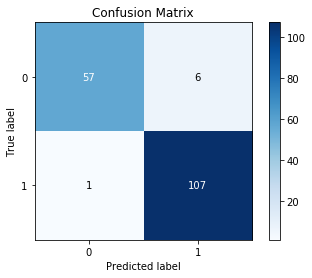

In [25]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_predicted)

### Si tengo un paciente con un cáncer maligno (0), ¿qué probabilidad hay de que el modelo lo clasifique como cáncer maligno (0)? 

La probabilidad de que lo clasifique bien es:

In [35]:
57 / (57+6)

0.9047619047619048

### Si tengo un paciente con un cáncer benigno (1), ¿qué probabilidad hay de que el modelo lo clasifique como cáncer benigno (1)? 

In [33]:
107 / (107 + 1)

0.9907407407407407

En este caso esta medida se conoce como `recall`, también lo podemos calcular como:

In [34]:
recall_score(y_test, y_predicted)

0.9907407407407407

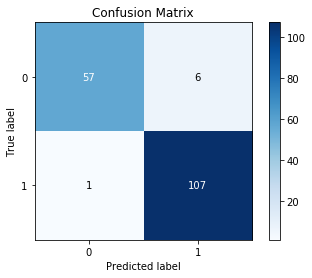

In [36]:
skplt.metrics.plot_confusion_matrix(y_test, y_predicted)

### Si tengo un paciente con un cáncer maligno (0), ¿qué probabilidad hay de que el modelo lo clasifique como cáncer benigno (1)? 

In [ ]:
6 / (57+6)

### Si tengo un paciente con un cáncer benigno (1), ¿qué probabilidad hay de que el modelo lo clasifique como cáncer maligno (0)? 

In [ ]:
1 / (107+1)

<div style="background-color:#009fdf; color:white; padding:30px; border-radius:5px; font-size:28px; font-weight:500;">
<span>Conclusiones</span>
</div>

## ¿Qué podrías concluir del clasificador?

Está bien, pero sería mejor que aumentara el % de acierto de los cánceres malignos. Porque a esa gente es mejor identificarla y no fallar nunca en su identificación.

A los falsos positivos les puedo repetir la prueba, pero a los falsos negativos no.

## ¿Se te ocurre alguna manera de mejorarlo?

* Utilizar modelos más potentes
* Ampliar el dataset
* Penalizar al modelo los falsos negativos con una matriz de coste

## ¿Es útil este modelo en la práctica?

Habría que contrastar los resultados con los clasificadores actuales (médicos) y también habría que identificar y cuantificar el coste de la extracción y preprocesamiento de los datos.